In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset

**Dataset** : https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/data

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 7)

In [10]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Data Cleaning

<AxesSubplot:>

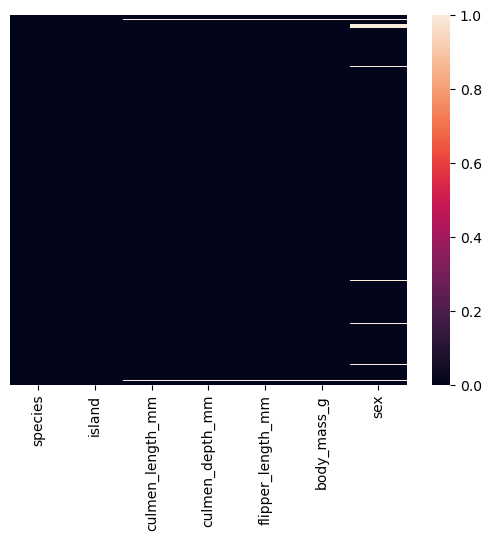

In [12]:
# Missing values
sns.heatmap(df.isnull(), yticklabels=False)

In [13]:
#Dropping the missing value
df.dropna(axis = 0, inplace=True)

In [14]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [16]:
#Checcking for the duplicates
df.duplicated().sum()

0

In [18]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [19]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [20]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### Exploratory Data Analysis

In [69]:
sns.set_theme()

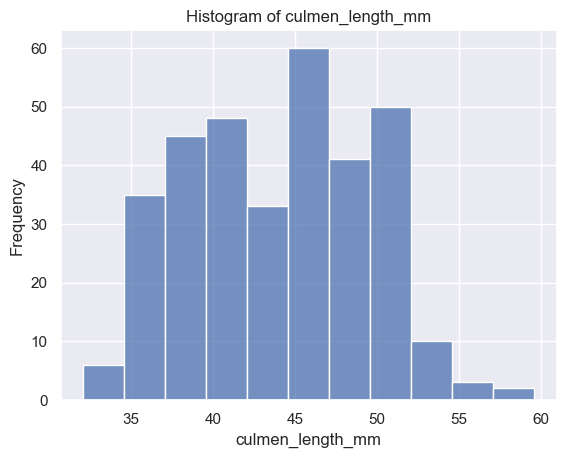

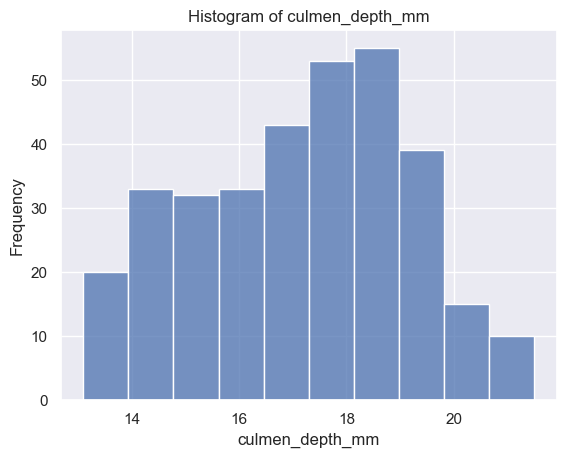

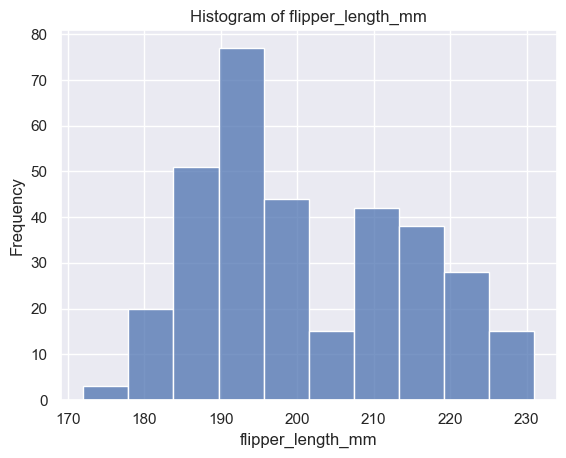

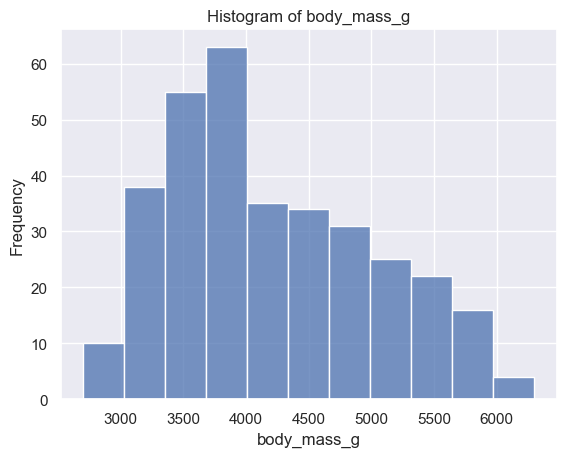

In [100]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for column in num_cols:
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

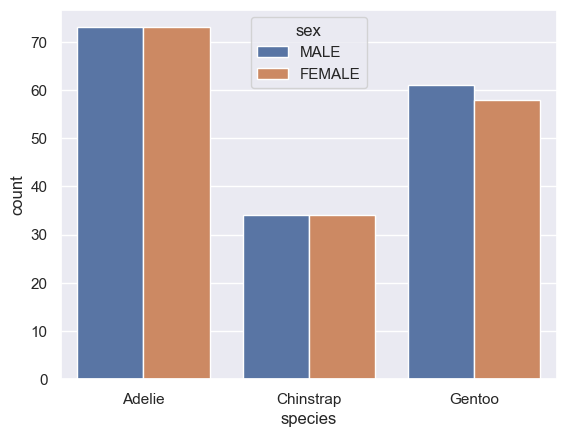

In [122]:
# Plot of number of penguins of each species
sns.countplot(x=df['species'],hue=df['sex'], data=df)
plt.show()

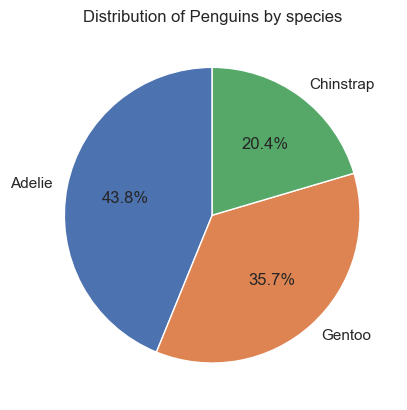

In [114]:
species_counts = df['species'].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Penguins by species')
plt.show()

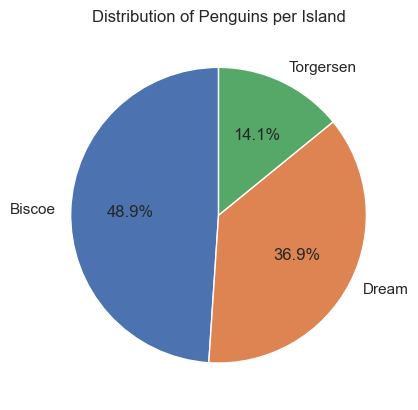

In [124]:
island_count = df['island'].value_counts()

plt.pie(island_count, labels = island_count.index, autopct = '%1.1f%%',startangle=90)
plt.title("Distribution of Penguins per Island")
plt.show()

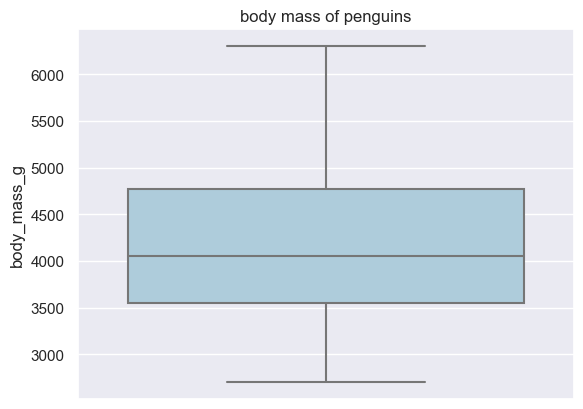

In [83]:
# Boxplot for the body mass of all the penguins
sns.boxplot(y = df['body_mass_g'],  palette="Paired", data=df)
plt.title("body mass of penguins")
plt.show()

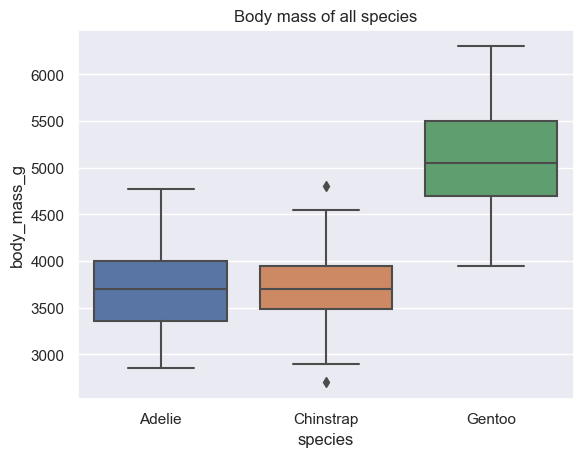

In [71]:
# Boxplot of all the bodymass of all species
sns.boxplot(y=df['body_mass_g'], x = df['species'], data=df)
plt.title("Body mass of all species")
plt.show()

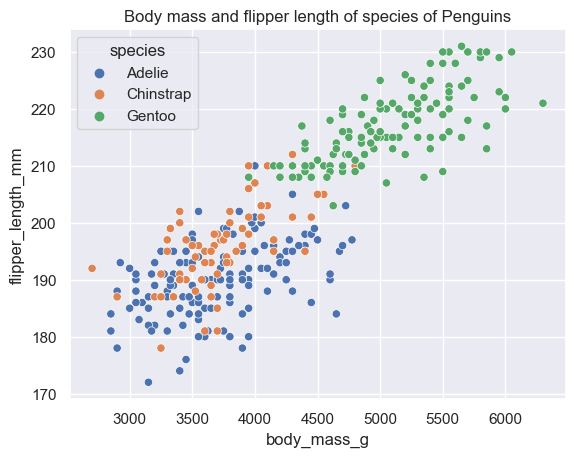

In [129]:
sns.scatterplot(x=df['body_mass_g'], y=df['flipper_length_mm'], hue=df['species'], data=df)
plt.title("Body mass and flipper length of species of Penguins")
plt.show()

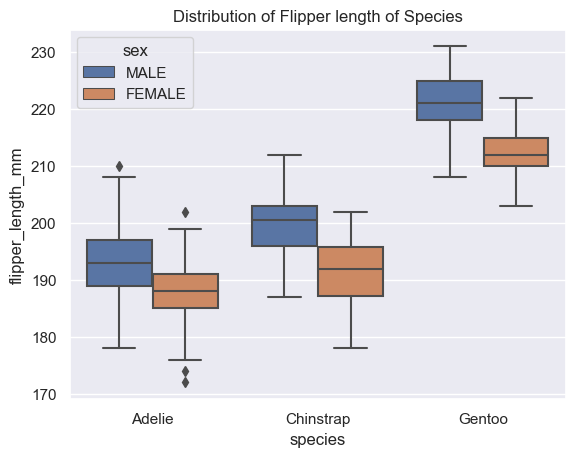

In [134]:

sns.boxplot(x=df['species'], y= df['flipper_length_mm'],hue=df['sex'], data=df)
plt.title("Distribution of Flipper length of Species")
plt.show()

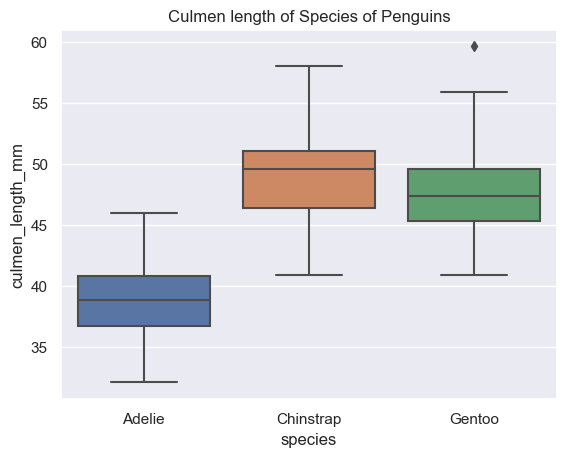

In [138]:
# Box plot of culmen depth of species
sns.boxplot(x=df['species'], y=df['culmen_length_mm'], data=df)
plt.title("Culmen length of Species of Penguins")
plt.show()

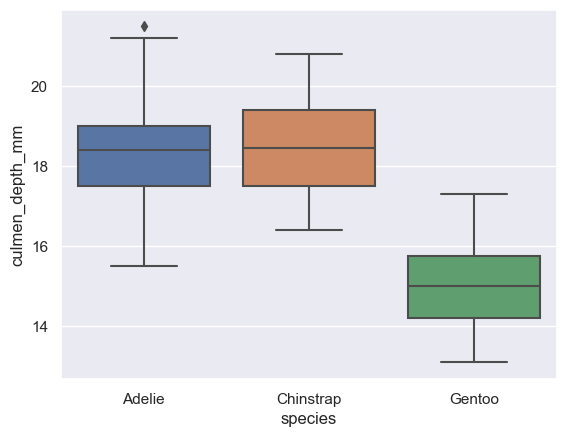

In [137]:
sns.boxplot(x=df['species'], y=df['culmen_depth_mm'], data=df)
plt.show()

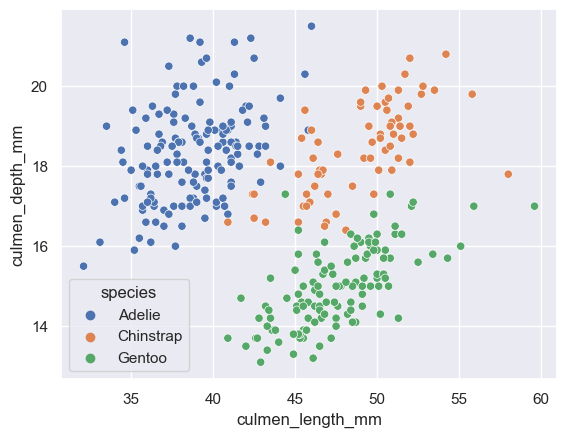

In [93]:
# Scatterplot of culmen depth and length and species
sns.scatterplot(x = df["culmen_length_mm"], y = df["culmen_depth_mm"],data = df,hue = df["species"])
plt.show()

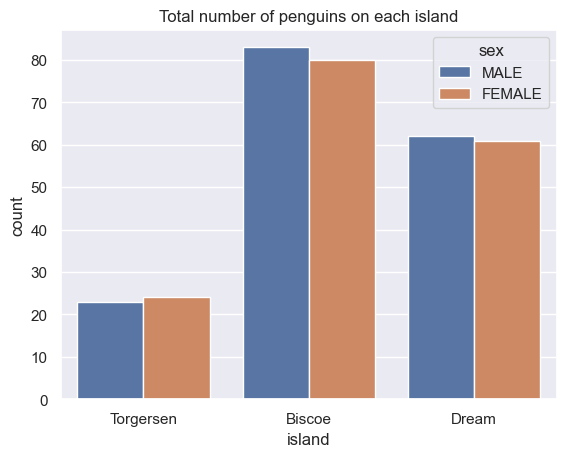

In [106]:
sns.countplot(x = df['island'],hue=df['sex'], data = df)
plt.title("Total number of penguins on each island")
plt.show()

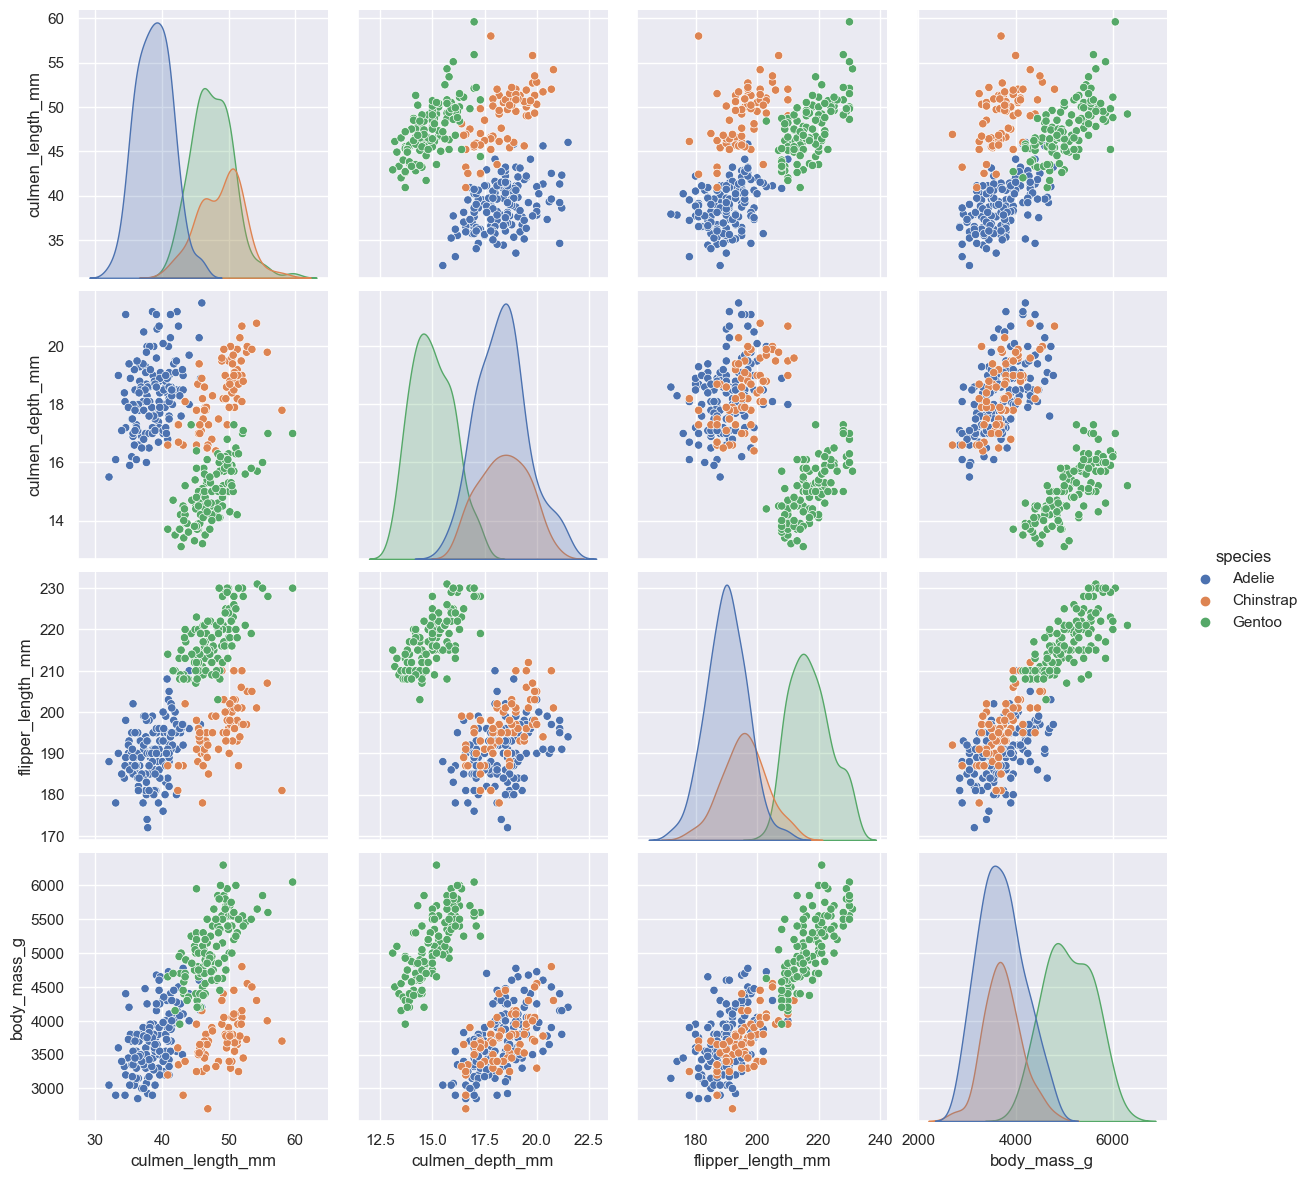

In [128]:
sns.pairplot(df, hue="species", height=3)
plt.show()

from the pairplot, we can see the linear realtionship in :
<br>
* body mass and flipper length
* body mass and culmen lenght
* culmen length and flipper length

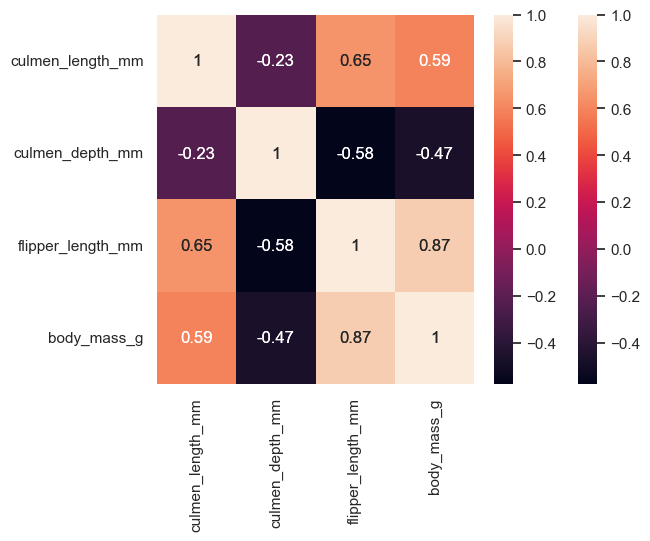

In [127]:
sns.heatmap(df.corr(), annot=True)
plt.show()